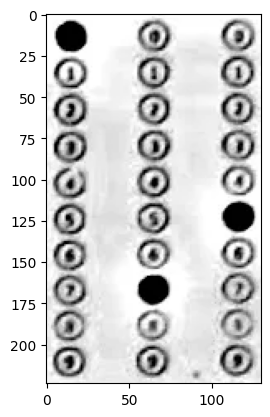

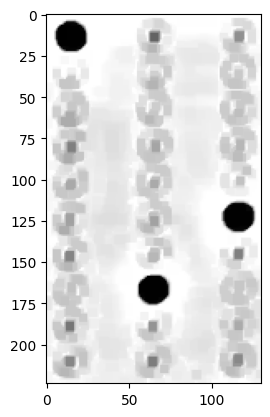

In [21]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import imutils

image = cv2.imread("static_2024_transformed_6472061004_21~bubbleSheet1.webp")
def cv2_imshow(cv2image):
    plt.imshow(cv2.cvtColor(cv2image, cv2.COLOR_BGR2RGB))
    plt.show()
    
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
kernel = np.ones((5,5),np.uint8)
gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
cv2_imshow(gray)

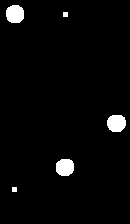

(224, 130)


In [22]:
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
display(Image.fromarray(thresh))
print(thresh.shape)

Found 5 contours
Found 3 bubbleCnts


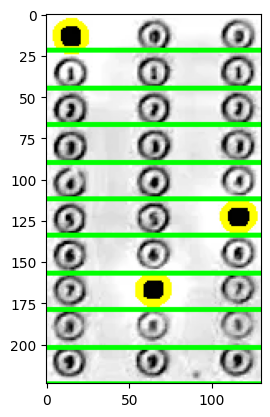

In [23]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
bubbleCnts = []
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    
    if w >= 12 and h >= 12:
        bubbleCnts.append(c)
print("Found {} contours".format(len(cnts)))
print("Found {} bubbleCnts".format(len(bubbleCnts)))

with_contours = cv2.drawContours(image.copy(), bubbleCnts, -1, (0, 255, 255), 3)
line_thickness = 2
step = 224 / 10
y = 0
for index in range(0,10):
    y += step
    cv2.line(with_contours, (0, round(y)), (130, round(y)), (0, 255, 0), thickness=line_thickness)
    
cv2_imshow(with_contours)

In [24]:
def extract_three_numbers(cnt, height: int):
    sorted_by_x = sorted(cnt, key=lambda ctr: cv2.boundingRect(ctr)[0])
    y_step = height / 10

    steps: list[float] = [idx * y_step for idx in range(0, 10)]

    digits = []
    for bubble in sorted_by_x:
        (x, y, w, h) = cv2.boundingRect(bubble)

        differences = [abs(step - y) for step in steps]
        digits.append(differences.index(min(differences)))

    zeroes = [0 for _ in range(0, 3 - len(digits))]
    return zeroes + digits

numbers = extract_three_numbers(bubbleCnts, thresh.shape[0])
print(f"The numbers in the bubble sheet: {numbers[0]}{numbers[1]}{numbers[2]}")

The numbers in the bubble sheet: 075
